# Demo EstimationPlots 

First, we need to load in Python the required packages. We will need 3 packages: 
- Dabest (package for estimation plots)
- Matplotlib (plot aesthetics)
- Pandas (to control datasheets)
- Statsmodels (for statistical analyses)

In [1]:
import dabest
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Figure 1 - Two groups

In [2]:
# Load file
df = pd.read_excel('./datasets/Fig_data.xlsx', sheet_name='1C')

In [3]:
# Show only the first five lines of the datasheet. If you want to see more, use df instead of df.head()
df.head()

,Animal_ID,Group,Values
0,1,Vehicle,3763
1,2,Vehicle,3610
2,3,Vehicle,4378
3,4,Vehicle,3456
4,5,Vehicle,3226


In [4]:
# Create object
data = dabest.load(data=df, x='Group', y='Values', idx=('Vehicle', 'Ttt'))

Statistical test results

In [5]:
data.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Vehicle,Ttt,5,10,mean difference,False,-1651.3,95,-2181.3,-1267.4,0.0,0.000098,6.759737,0.000018,6.581332,0.002624,50.0


Prepare the plots

In [6]:
# Plot details 

'''Label of the left Y axis'''
y_label = 'Number of steps'  

'''
Left Y axis limits. Use the format (min, max). 
If left None the program will decide. 
'''
y_axis_lim = (0, 5000) 

'''
Dot size in the swarm plot
'''
dot_size = 6

'''
Colors of the group. 
Use https://matplotlib.org/stable/gallery/color/named_colors.html for color code.
You can also use hexadecimal colors with the #XXXXXX. 
As a list: ['a', 'b', 'c', ...]
'''
colors = ['blue', 'orange'] 

'''
Label of the right Y axis
'''
contrast_label = 'Mean difference'


'''
Group names. 
As a list: ['a', 'b', 'c', ...]
'''
group_names = ['Vehicle', 'Ttt']

'''
Name of the output file.
Include the desired extenstion (.pdf, .png)
'''
output = 'Figure1.pdf'

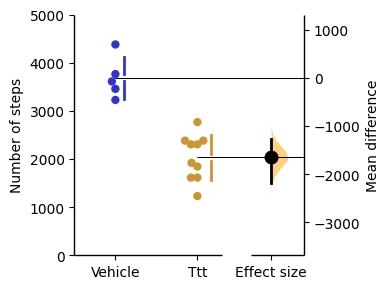

In [7]:
# Do the plot
p = data.mean_diff.plot(group_summaries='mean_sd', 
                        swarm_label=y_label, 
                        swarm_ylim=y_axis_lim,
                        raw_marker_size=dot_size,
                        custom_palette=colors, 
                        swarm_desat=.6, 
                        contrast_label=contrast_label,
                        halfviolin_alpha=.5, contrast_ylim=(0, -3000),
                        halfviolin_desat=1, 
                        fig_size=(4,3))

rawdata_axes = p.axes[0]
effsize_axes = p.axes[1]

rawdata_axes.set_xticklabels(group_names)
effsize_axes.set_xticklabels(["", "Effect size"])

plt.savefig('./{}'.format(output))

plt.show()

In [8]:
# Export Stats results
data.mean_diff.statistical_tests.to_excel(f"{output.split('.')[0]}-stats.xlsx")

## Figure 2 - Response to XXX

In [9]:
# Load file
df = pd.read_excel('./datasets/Fig_data.xlsx', sheet_name='paired')

In [10]:
# Check dataframe
df.head()

,Animal_ID,Group,Values
0,1,2mo,3763
1,2,2mo,3610
2,3,2mo,4378
3,4,2mo,3456
4,5,2mo,3226


Here, we will perform a One-Way ANOVA to compare the results. On line #3 of the next cell, the names needs to match the column names from the dataset above. 

In [11]:
# Perform One-Way ANOVA and print results

lm = smf.ols('Values ~ C(Group)', data=df).fit()
print("One-Way ANOVA")
print(f'F({int(lm.df_model)}, {int(lm.df_resid)}) = {lm.fvalue:.6f}')
print(f'p value = {lm.f_pvalue}')

One-Way ANOVA
F(2, 27) = 42.644893
p value = 4.4036965694222745e-09


Pairwise comparisons using Tukey's post-hoc method

In [12]:
tuk = pairwise_tukeyhsd(df['Values'], df['Group'])
tuk.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
2mo,4mo,-1611.6,0.001,-2111.1127,-1112.0873,True
2mo,8mo,-1611.6,0.001,-2111.1127,-1112.0873,True
4mo,8mo,0.0,0.9,-499.5127,499.5127,False


In [13]:
# Create object
data = dabest.load(data=df, x='Group', y='Values', idx=('2mo', '4mo', '8mo'), 
                   id_col='Animal_ID', paired=False)

Statistical test results

In [14]:
# Plot details 

'''Label of the left Y axis'''
y_label = 'Levels of the best protein \n (% of controls)'  

'''
Left Y axis limits. Use the format (min, max). 
If left None the program will decide. 
'''
y_axis_lim = None  

'''
Colors of the group. 
Use https://matplotlib.org/stable/gallery/color/named_colors.html for color code.
You can also use hexadecimal colors with the #XXXXXX. 
As a list: ['a', 'b', 'c', ...]
'''
colors = ['black', 'red', 'red'] 

'''
Label of the right Y axis
'''
contrast_label = 'Mean difference'


'''Limits of bottom contrast plot. Use (min, max) format'''
contrast_lim = (-3000, 500)

'''
Group names. 
As a list: ['a', 'b', 'c', ...]
'''
group_names = ['2mo', "4mo", '8mo']

'''
Name of the output file.
Include the desired extenstion (.pdf, .png)
'''
output = 'Figure2.pdf'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


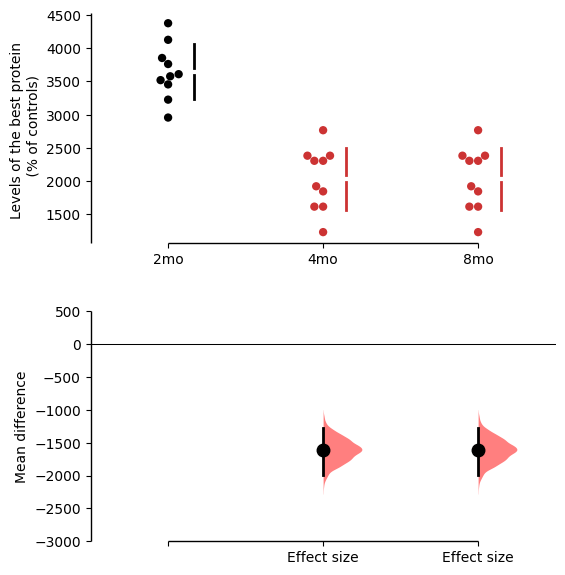

In [15]:
# Do the plot
p = data.mean_diff.plot(group_summaries='mean_sd', 
                        swarm_label=y_label, 
                        swarm_ylim=y_axis_lim,
                        custom_palette=colors, 
                        swarm_desat=.6, 
                        contrast_label=contrast_label, 
                        contrast_ylim=contrast_lim,
                        halfviolin_alpha=.5, 
                        halfviolin_desat=1, 
                        fig_size=(6,7), )

rawdata_axes = p.axes[0]
effsize_axes = p.axes[1]

rawdata_axes.set_xticklabels(group_names)
effsize_axes.set_xticklabels([" ", "Effect size", 'Effect size'])

plt.savefig('./{}'.format(output))

plt.show()

In [16]:
# Export the stats in an Excel sheet with a similar name as the figure
with pd.ExcelWriter(f"{output.split('.')[0]}-stats.xlsx") as writer:
    anova_lm(lm).to_excel(writer, 'ANOVA')
    pd.DataFrame(tuk.summary()).to_excel(writer, 'Post-hoc', index=None)

## Figure 3 - 2 by 2 design

In [17]:
# Load file
df = pd.read_excel('./datasets/Fig_data.xlsx', sheet_name='4_groups')

In [18]:
# Check the dataset
df.head()

,Animal_ID,Condition1,Condition2,Values
0,1,Vehicle,None,3763
1,2,Vehicle,None,3610
2,3,Vehicle,None,4378
3,4,Vehicle,None,3456
4,5,Vehicle,None,3226


In [20]:
# Perform Two-Way ANOVA and print results
lm = smf.ols('Values ~ Condition1 * Condition2', data=df).fit()

In [21]:
# Print Two-Way ANOVA Table
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
Condition1,1.0,2675461.25,2675461.250,14.846322,0.001406
Condition2,1.0,2126172.05,2126172.050,11.798278,0.003401
Condition1:Condition2,1.0,2538281.25,2538281.250,14.085101,0.001737
Residual,16.0,2883366.00,180210.375,NaN,NaN


In [22]:
tuk = pairwise_tukeyhsd(df['Values'], df['Group'])
tuk.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Ttt-LD,Ttt-None,-1364.6,0.001,-2132.8013,-596.3987,True
Ttt-LD,Vehicle-LD,19.0,0.9,-749.2013,787.2013,False
Ttt-LD,Vehicle-None,79.4,0.9,-688.8013,847.6013,False
Ttt-None,Vehicle-LD,1383.6,0.001,615.3987,2151.8013,True
Ttt-None,Vehicle-None,1444.0,0.001,675.7987,2212.2013,True
Vehicle-LD,Vehicle-None,60.4,0.9,-707.8013,828.6013,False


In [ ]:
# We will now create a column combining the 2 grouping columns to ease plotting
df['Group'] = df['Condition1'] + '-' + df['Condition2']

In [23]:
# Create object
data = dabest.load(data=df, x='Group', y='Values', 
                   idx=(('Vehicle-None','Ttt-None'), ('Vehicle-LD', 'Ttt-LD')), 
                   id_col='Animal_ID', paired=False)

In [24]:
# Plot details 

'''Label of the left Y axis'''
y_label = 'Levels of the best protein'  

'''
Left Y axis limits. Use the format (min, max). 
If left None the program will decide. 
'''
y_axis_lim = None  

'''
Colors of the group. 
Use https://matplotlib.org/stable/gallery/color/named_colors.html for color code.
You can also use hexadecimal colors with the #XXXXXX. 
As a list: ['a', 'b', 'c', ...]
'''
colors = ['black', 'orange', 'red', 'blue'] 

'''
Label of the right Y axis
'''
contrast_label = 'Mean difference'

'''
Group names. 
As a list: ['a', 'b', 'c', ...]
'''
group_names = ['Ctrl', "Ttt", "Ctrl+LD", 'Ttt+LD']

'''
Name of x ticks for contrast plot
'''
contrast_x_names = ['', 'Effect size', '', 'Effect size']


'''
Name of the output file.
Include the desired extenstion (.pdf, .png)
'''
output = 'Figure3.pdf'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


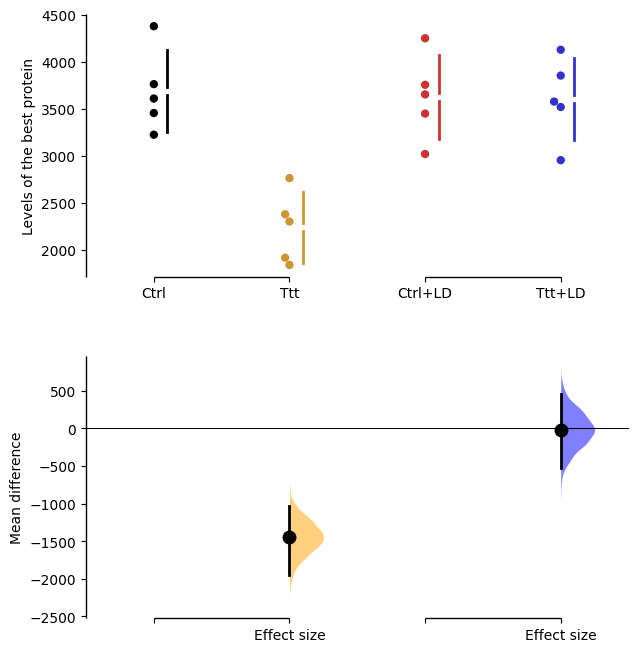

In [25]:
# Do the plot
p = data.mean_diff.plot(swarm_label=y_label, 
                        swarm_ylim=y_axis_lim,
                        custom_palette=colors, 
                        swarm_desat=.6, 
                        contrast_label=contrast_label,
                        halfviolin_alpha=.5, 
                        halfviolin_desat=1, 
                        fig_size=(7,8))

rawdata_axes = p.axes[0]
effsize_axes = p.axes[1]

rawdata_axes.set_xticklabels(group_names)
effsize_axes.set_xticklabels(contrast_x_names)

plt.savefig('./{}'.format(output))

plt.show()

In [26]:
# Export the stats in an Excel sheet with a similar name as the figure
with pd.ExcelWriter(f"{output.split('.')[0]}-stats.xlsx") as writer:
    anova_lm(lm).to_excel(writer, 'ANOVA')
    pd.DataFrame(tuk.summary()).to_excel(writer, 'Post-hoc', index=None)

## Figure 4 - 3 groups with a shared control

In [27]:
# Load file
df = pd.read_excel('./datasets/Fig_data.xlsx', sheet_name='shared_control')

In [28]:
# Check the dataframe
df.head()

,Animal_ID,Group,Values
0,1,Vehicle,3763
1,2,Vehicle,3610
2,3,Vehicle,4378
3,4,Vehicle,3456
4,5,Vehicle,3226


In [29]:
# Perform One-Way ANOVA and print results

lm = smf.ols('Values ~ C(Group)', data=df).fit()
print("One-Way ANOVA")
print(f'F({int(lm.df_model)}, {int(lm.df_resid)}) = {lm.fvalue:.6f}')
print(f'p value = {lm.f_pvalue}')

One-Way ANOVA
F(3, 16) = 13.505769
p value = 0.00011913384063855029


In [30]:
tuk = pairwise_tukeyhsd(df['Values'], df['Group'])
tuk.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Ttt,Ttt + PP,1383.6,0.001,610.1679,2157.0321,True
Ttt,Ttt + PP2,1383.6,0.001,610.1679,2157.0321,True
Ttt,Vehicle,1444.0,0.001,670.5679,2217.4321,True
Ttt + PP,Ttt + PP2,0.0,0.9,-773.4321,773.4321,False
Ttt + PP,Vehicle,60.4,0.9,-713.0321,833.8321,False
Ttt + PP2,Vehicle,60.4,0.9,-713.0321,833.8321,False


In [31]:
# Create object
data = dabest.load(data=df, x='Group', y='Values', 
                   idx=('Vehicle', 'Ttt', 'Ttt + PP', 'Ttt + PP2'), 
                   id_col='Animal_ID', paired=False)

In [32]:
# Plot details 

'''Label of the left Y axis'''
y_label = 'Behavioral output'  

'''
Left Y axis limits. Use the format (min, max). 
If left None the program will decide. 
'''
y_axis_lim = None  

'''
Colors of the group. 
Use https://matplotlib.org/stable/gallery/color/named_colors.html for color code.
You can also use hexadecimal colors with the #XXXXXX. 
As a list: ['a', 'b', 'c', ...]
'''
colors = ['black', 'red', 'orange', 'blue'] 

'''
Label of the right Y axis
'''
contrast_label = 'Mean difference'

'''
Group names. 
As a list: ['a', 'b', 'c', ...]
'''
group_names = ['Ctrl', "Ttt", "Ttt+PP", 'Ttt+PP2']

'''
Name of the output file.
Include the desired extenstion (.pdf, .png)
'''
output = 'Figure4.pdf'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


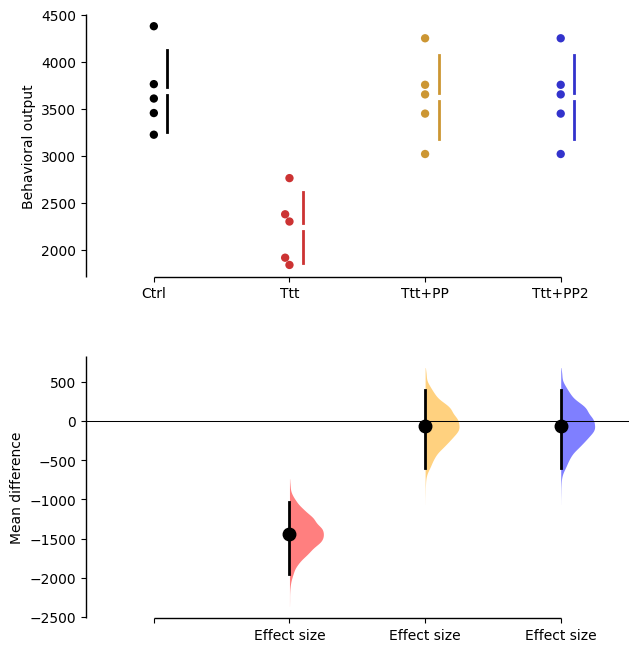

In [33]:
# Do the plot
p = data.mean_diff.plot(swarm_label=y_label, 
                        swarm_ylim=y_axis_lim,
                        custom_palette=colors, 
                        swarm_desat=.6, 
                        contrast_label=contrast_label,
                        halfviolin_alpha=.5, 
                        halfviolin_desat=1, 
                        fig_size=(7,8))

rawdata_axes = p.axes[0]
effsize_axes = p.axes[1]

rawdata_axes.set_xticklabels(group_names)
effsize_axes.set_xticklabels(["", "Effect size", 'Effect size', "Effect size"])

plt.savefig('./{}'.format(output))

plt.show()

In [34]:
# Export the stats in an Excel sheet with a similar name as the figure
with pd.ExcelWriter(f"{output.split('.')[0]}-stats.xlsx") as writer:
    anova_lm(lm).to_excel(writer, 'ANOVA')
    pd.DataFrame(tuk.summary()).to_excel(writer, 'Post-hoc', index=None)

## Figure 5 - Loops with identical Y labels 

In [35]:
# Load file
df = pd.read_excel('./datasets/Fig_data.xlsx', sheet_name='loop')

In [36]:
# Plot details 

'''Label of the left Y axis'''
y_label = 'Biochemical measure'  

'''
Left Y axis limits. Use the format (min, max). 
If left None the program will decide. 
'''
y_axis_lim = (0,200)  

'''
Colors of the group. 
Use https://matplotlib.org/stable/gallery/color/named_colors.html for color code.
You can also use hexadecimal colors with the #XXXXXX. 
As a list: ['a', 'b', 'c', ...]
'''
colors = ['black', 'orange'] 

'''
Label of the right Y axis
'''
contrast_label = 'Mean difference'

'''
Group names. 
As a list: ['a', 'b', 'c', ...]
'''
group_names = ['Ctrl', "Ttt"]

'''
Name of the output file.
Include the desired extenstion (.pdf, .png)
'''
output = 'Figure5.pdf'

In [37]:
print("{} plots will be made".format(len(df.columns[2:])))

4 plots will be made


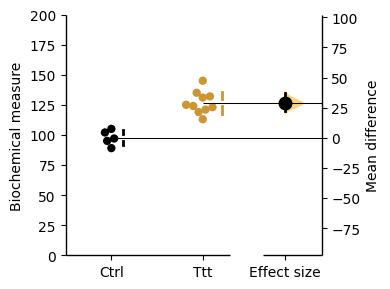

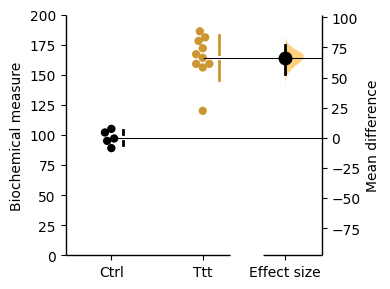

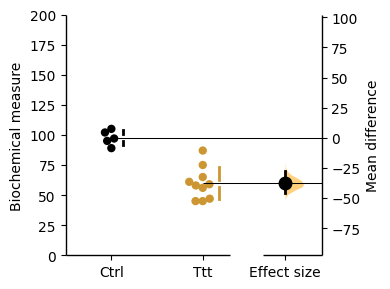

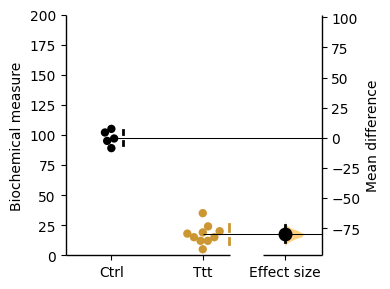

In [38]:
for index, col in enumerate(df.columns[2:]):
    
    filename = output.split('.')
    
    # Create object
    data = dabest.load(data=df, x='Group', y=col, 
                   idx=('Vehicle', 'Ttt'), 
                   id_col='Animal_ID', paired=False)
    
    
    # Save the stats in an excel file
    data.mean_diff.statistical_tests.to_excel('./{}-{}-stats.xlsx'.format(filename[0], index))
    
    ## Do the plot
    p = data.mean_diff.plot(group_summaries='mean_sd', 
                            swarm_label=y_label, 
                            swarm_ylim=y_axis_lim,
                            custom_palette=colors, 
                            swarm_desat=.6, 
                            contrast_label=contrast_label,
                            halfviolin_alpha=.5, 
                            halfviolin_desat=1, 
                            fig_size=(4,3))

    rawdata_axes = p.axes[0]
    effsize_axes = p.axes[1]

    rawdata_axes.set_xticklabels(group_names)
    effsize_axes.set_xticklabels(["", "Effect size"])
    
    plt.savefig('./{}-{}.{}'.format(filename[0], index, filename[1]))

    plt.show()

## Figure 6 - Loops with different Y axis labels

In [39]:
# Load file
df = pd.read_excel('./datasets/Fig_data.xlsx', sheet_name='loop')

In [40]:
# Plot details 

'''Label of the left Y axis'''
y_label = ['Measure 1', 'Method 2', 'Thing 3', 'Output 4']

'''
Left Y axis limits. Use the format (min, max). 
If left None the program will decide. 
'''
y_axis_lim = None  

'''
Colors of the group. 
Use https://matplotlib.org/stable/gallery/color/named_colors.html for color code.
You can also use hexadecimal colors with the #XXXXXX. 
As a list: ['a', 'b', 'c', ...]
'''
colors = ['black', 'orange'] 

'''
Label of the right Y axis
'''
contrast_label = 'Mean difference'

'''
Group names. 
As a list: ['a', 'b', 'c', ...]
'''
group_names = ['Ctrl', "Ttt"]

'''
Name of the output file.
Include the desired extenstion (.pdf, .png)
'''
output = 'Figure6.pdf'

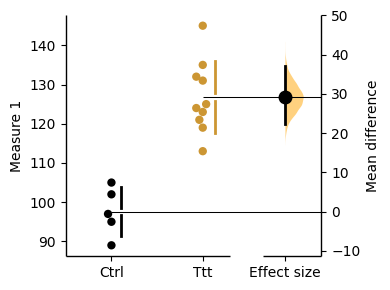

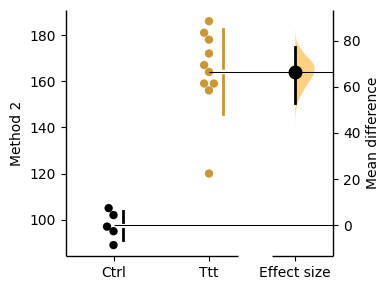

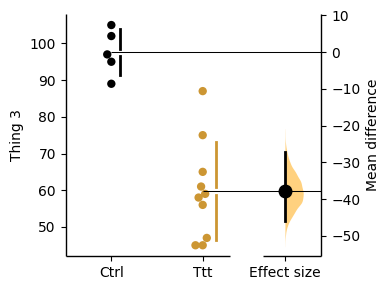

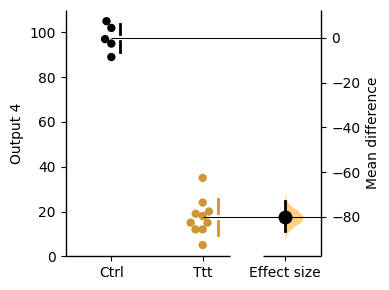

In [41]:
for index, col in enumerate(df.columns[2:]):
    
    filename = output.split('.')
    
    # Create object
    data = dabest.load(data=df, x='Group', y=col, 
                   idx=('Vehicle', 'Ttt'), 
                   id_col='Animal_ID', paired=False)
    
    # Save the stats in an excel file
    data.mean_diff.statistical_tests.to_excel('./{}-{}-stats.xlsx'.format(filename[0], index))
    
    
    # Do the plot
    p = data.mean_diff.plot(group_summaries='mean_sd', 
                            swarm_label=y_label[index], 
                            swarm_ylim=y_axis_lim,
                            custom_palette=colors, 
                            swarm_desat=.6, 
                            contrast_label=contrast_label,
                            halfviolin_alpha=.5, 
                            halfviolin_desat=1, 
                            fig_size=(4,3))

    rawdata_axes = p.axes[0]
    effsize_axes = p.axes[1]

    rawdata_axes.set_xticklabels(group_names)
    effsize_axes.set_xticklabels(["", "Effect size"])
    
    filename = output.split('.')
    
    plt.savefig('./{}-{}.{}'.format(filename[0], col, filename[1]))

    plt.show()